In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("spam.csv",encoding = "ISO-8859-1" )

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2454,ham,Left dessert. U wan me 2 go suntec look 4 u?,NaN,NaN,NaN
4588,ham,Have you not finished work yet or something?,NaN,NaN,NaN
1463,ham,Ok good then i later come find Ì_... C lucky i...,NaN,NaN,NaN
1437,ham,Wat so late still early mah. Or we juz go 4 di...,NaN,NaN,NaN
5164,spam,Congrats 2 mobile 3G Videophones R yours. call...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

## Plan of Attack 

In [5]:
#  1. Data Cleaning
#  2. EDA
#  3. Text Preprocessing
#  4. Model Building
#  5. Evaluation
#  6. Improvement
#  7. WebSite
#  8. Deploy

## Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# Drop the Cloumns

df = df.drop(columns=['Unnamed: 2','Unnamed: 4','Unnamed: 3'])

In [8]:
df.rename(columns={"v1":"target" , "v2" : "text"},inplace=True)

In [9]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder() 

In [11]:
df['target'] = encoder.fit_transform(df['target'])

In [12]:
df.head()

# 0---->not spam / ham
# 1----->  spam

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# missing values

df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
# Check for duplicated values
df.duplicated().sum()

403

In [15]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

## EDA

In [17]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

([<matplotlib.patches.Wedge at 0x17fb5ad58e0>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

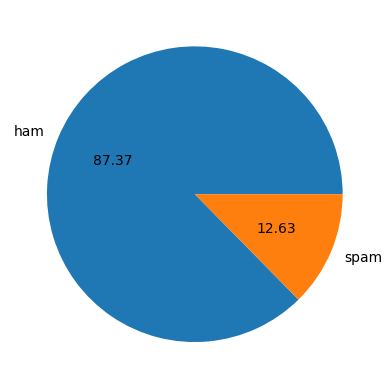

In [19]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts() , labels=['ham' ,'spam'] , autopct='%0.2f')

In [20]:
# Data is imbalanced

In [21]:
import nltk

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Vishal
[nltk_data]     Ghuge\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
# num of charecters
df['num_charecters'] = df['text'].apply(len)

In [24]:
df.head()

,target,text,num_charecters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
# num of words
df['num_words'] = df['text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [26]:
df.head()

,target,text,num_charecters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [27]:
# num of sentence
df['num_sentence'] = df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [28]:
df.head()

,target,text,num_charecters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [29]:
df[['num_charecters','num_words','num_sentence']].describe()

,num_charecters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
# ham
df[df['target'] == 0][['num_charecters','num_words','num_sentence']].describe()

,num_charecters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
# spam
df[df['target'] == 1][['num_charecters','num_words','num_sentence']].describe()

,num_charecters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [32]:
import seaborn as sns

<Axes: xlabel='num_charecters', ylabel='Count'>

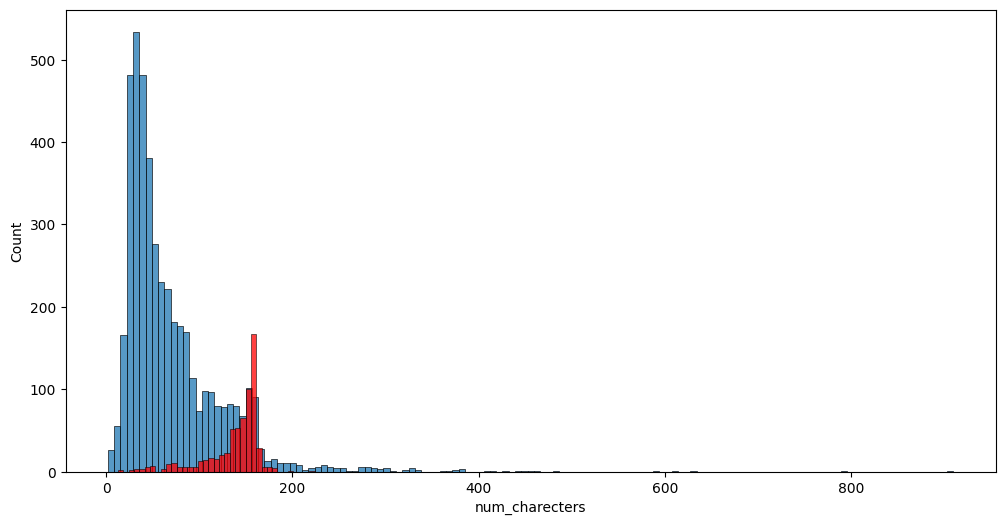

In [33]:
plt.figure(figsize = (12,6))
sns.histplot(df[df['target']== 0]['num_charecters'])
sns.histplot(df[df['target']== 1]['num_charecters'] , color='red')

<Axes: xlabel='num_words', ylabel='Count'>

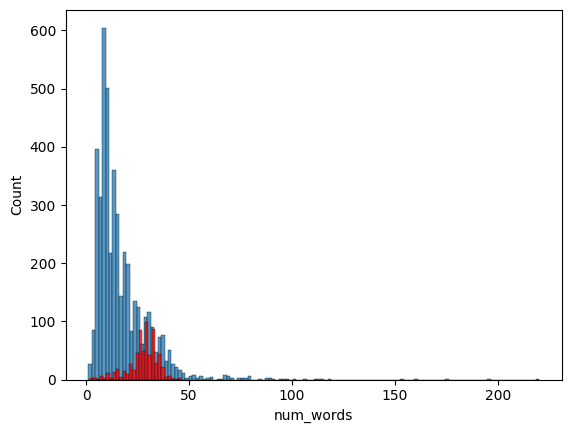

In [34]:
sns.histplot(df[df['target']== 0]['num_words'])
sns.histplot(df[df['target']== 1]['num_words'] , color='red')

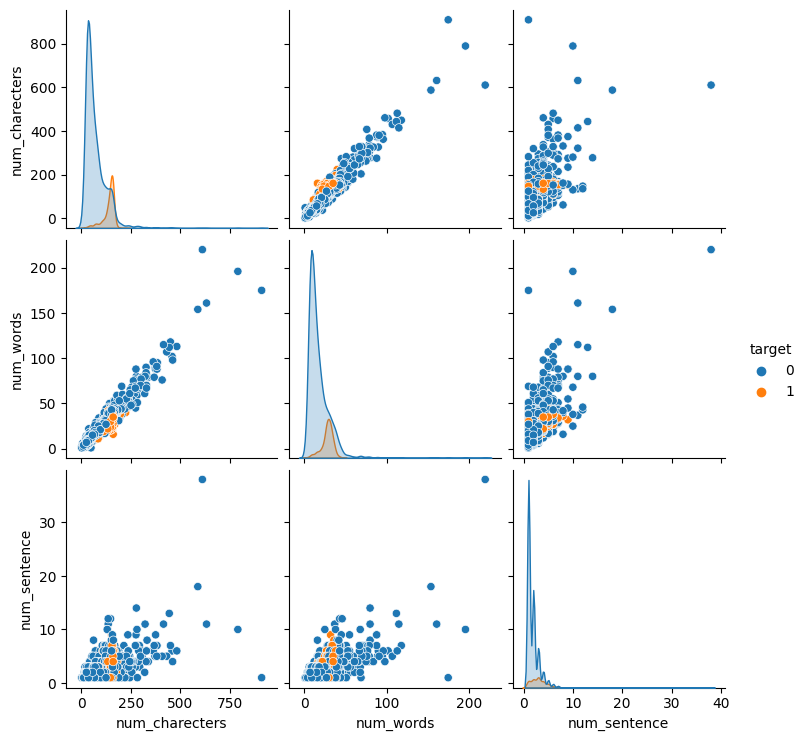

In [35]:
sns.pairplot(df , hue = 'target')

In [36]:
df.corr()

C:\Users\Vishal Ghuge\AppData\Local\Temp\ipykernel_23656\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,target,num_charecters,num_words,num_sentence
target,1.000000,0.384717,0.262912,0.263939
num_charecters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentence,0.263939,0.624139,0.679971,1.000000


C:\Users\Vishal Ghuge\AppData\Local\Temp\ipykernel_23656\1235720856.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr() ,annot = True)


<Axes: >

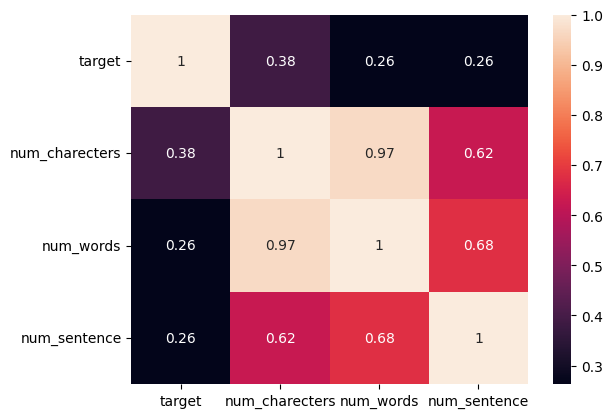

In [37]:
sns.heatmap(df.corr() ,annot = True)

## Data Preprocessing

1. Lower case
2. Tokeniation
3. removing special charectors
4. removing stop word and punctuation
5. stemming

In [38]:
from nltk.corpus import stopwords
import string

from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
nltk.download('stopwords')

stop_words = stopwords.words('english')  # it gives list of stopwords in english

punctuations = string.punctuation       # it gives list of all punctuations



def transform_text(text):
    
    text = text.lower()
    
    text = nltk.word_tokenize(text)
    
    text = [word for word in text if word.isalnum()]  # for removing special charecters
    
    text = [word for word in text if word not in stop_words and word not in punctuations]
    
    text = [stemmer.stem(word) for word in text]
    
    return " ".join(text)


    

In [43]:
df['transformed_text'] = df['text'].apply(transform_text)

In [44]:
df.head()

,target,text,num_charecters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [47]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(df,column):
    df = df[column].str.cat(sep = " ")

    word_cloud =WordCloud(width=700,height=500,background_color='white').generate(df)
    plt.figure(figsize=(10,15))
    plt.imshow(word_cloud)
    plt.axis("off")
    plt.show()

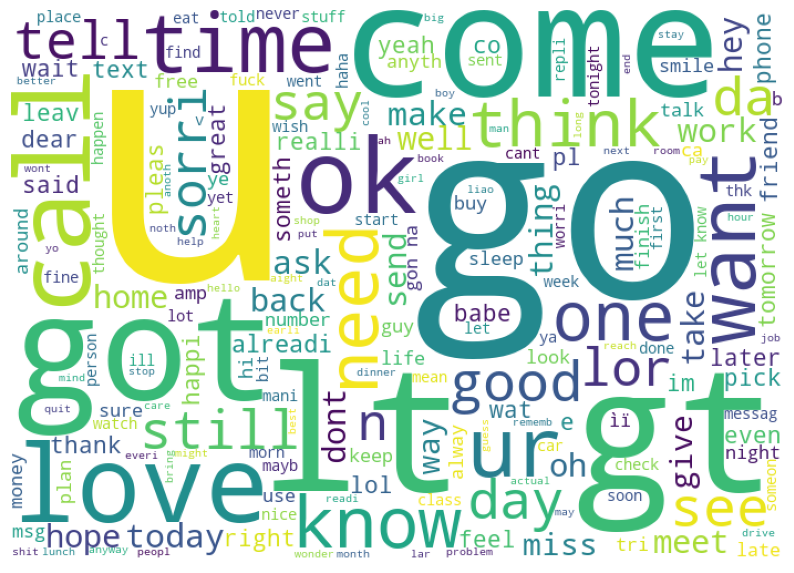

In [48]:
# for ham text

ham = df[df['target'] == 0]
generate_wordcloud(ham,'transformed_text')

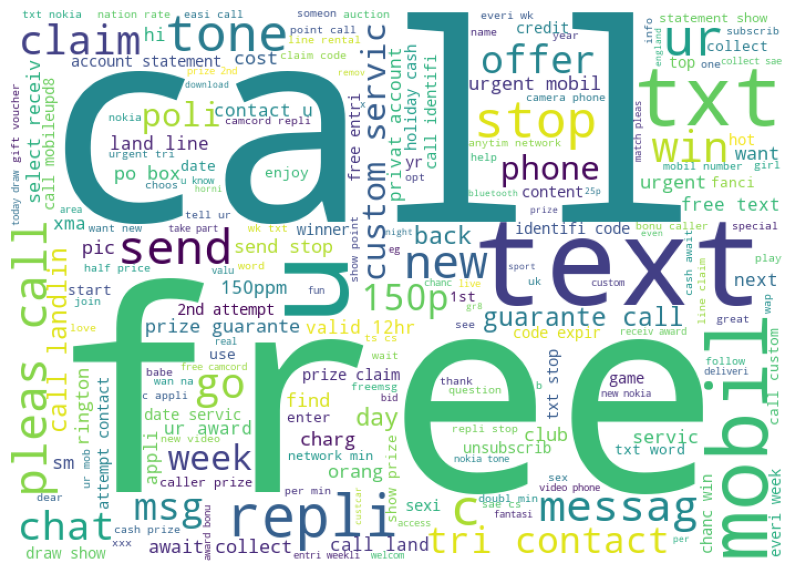

In [49]:
# for spam text

spam = df[df['target'] == 1]
generate_wordcloud(spam,'transformed_text')

In [50]:
spam_corpus = []

for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        
        spam_corpus.append(word)
        
    

In [51]:
len(spam_corpus)

9939

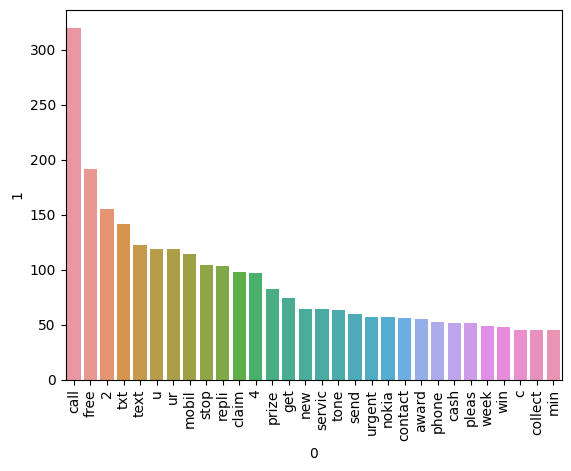

In [52]:
from collections import Counter

sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0] ,  y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1] )

plt.xticks(rotation = 'vertical')
plt.show()

In [53]:
# custmize code

# dic = {}

# for i in spam_corpus:
#     if i in dic.keys():
#         continue
#     else:
#         dic[i] = spam_corpus.count(i)

# dic

In [54]:
ham_corpus = []

for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        
        ham_corpus.append(word)

In [55]:
len(ham_corpus)

35404

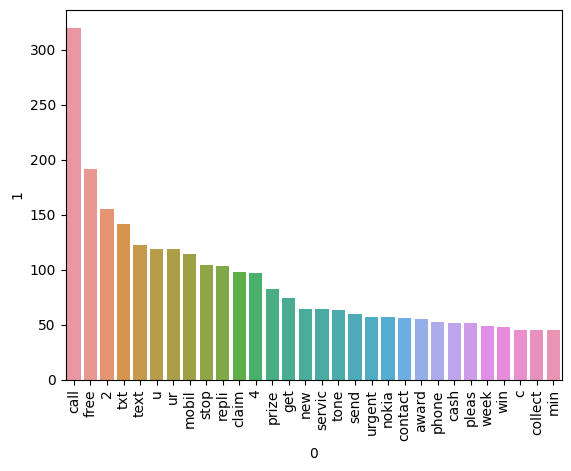

In [56]:
from collections import Counter

sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0] ,  y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1] )

plt.xticks(rotation = 'vertical')
plt.show()

## 4. Model Building

In [139]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
tfidf= TfidfVectorizer(max_features=3000)

In [119]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

In [144]:
# appending the num_character col to X
# X = np.hstack((X,df['num_charecters'].values.reshape(-1,1)))

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score

In [99]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [142]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [145]:
X.shape

(5169, 3001)

In [102]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [146]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2 , stratify=y)

In [104]:
gnb.fit(X_train , y_train)
y_predict1 = gnb.predict(X_test)
print(accuracy_score(y_test , y_predict1))
print(confusion_matrix(y_test , y_predict1))
print(precision_score(y_test , y_predict1))

0.8771760154738878
[[790 113]
 [ 14 117]]
0.508695652173913


In [105]:
mnb.fit(X_train , y_train)
y_predict2 = mnb.predict(X_test)
print(accuracy_score(y_test , y_predict2))
print(confusion_matrix(y_test , y_predict2))
print(precision_score(y_test , y_predict2))

0.9671179883945842
[[903   0]
 [ 34  97]]
1.0


In [106]:
bnb.fit(X_train , y_train)
y_predict3 = bnb.predict(X_test)
print(accuracy_score(y_test , y_predict3))
print(confusion_matrix(y_test , y_predict3))
print(precision_score(y_test , y_predict3))


0.97678916827853
[[901   2]
 [ 22 109]]
0.9819819819819819


In [107]:
# tfidf --> MNB

In [147]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [148]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [149]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [150]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [151]:
train_classifier(svc,X_train,y_train,X_test,y_test)

C:\Users\Vishal Ghuge\.conda\envs\sms_spam\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.8733075435203095, 0.0)

In [152]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

C:\Users\Vishal Ghuge\.conda\envs\sms_spam\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  SVC
Accuracy -  0.8733075435203095
Precision -  0.0
For  KN
Accuracy -  0.9235976789168279
Precision -  0.6884057971014492
For  NB
Accuracy -  0.9487427466150871
Precision -  1.0
For  DT
Accuracy -  0.9516441005802708
Precision -  0.9090909090909091
For  LR
Accuracy -  0.9622823984526112
Precision -  0.9181818181818182
For  RF
Accuracy -  0.9777562862669246
Precision -  0.990909090909091
For  AdaBoost
Accuracy -  0.9642166344294004
Precision -  0.8852459016393442
For  BgC
Accuracy -  0.971953578336557
Precision -  0.9180327868852459
For  ETC
Accuracy -  0.988394584139265
Precision -  0.9917355371900827
For  GBDT
Accuracy -  0.9564796905222437
Precision -  0.8981481481481481
For  xgb
Accuracy -  0.9787234042553191
Precision -  0.936


In [115]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [86]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [87]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.914894
1,NB,Accuracy,0.983559
2,ETC,Accuracy,0.986460
3,RF,Accuracy,0.982592
4,SVC,Accuracy,0.987427
5,GBDT,Accuracy,0.957447
6,LR,Accuracy,0.960348
7,xgb,Accuracy,0.970019
8,AdaBoost,Accuracy,0.965184
9,BgC,Accuracy,0.963250


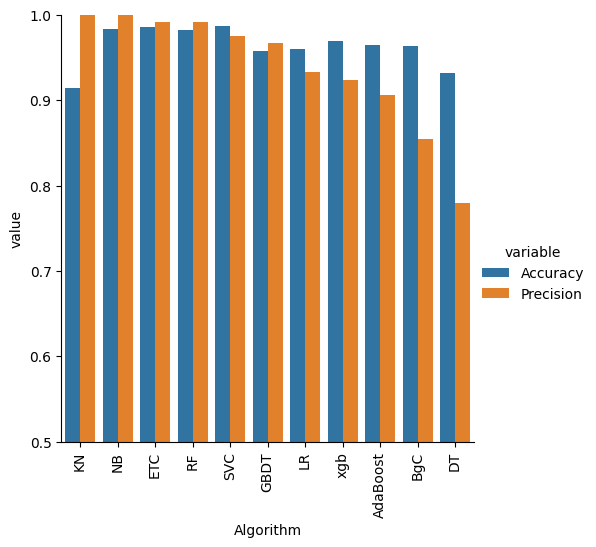

In [88]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# model improve
# 1. Change the max_features parameter of TfIdf        ------> 3000



In [92]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [117]:
new_df = performance_df.merge(temp_df , on = 'Algorithm')
new_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.901354,1.000000,0.914894,1.000000
1,NB,0.967118,1.000000,0.983559,1.000000
2,RF,0.981625,1.000000,0.982592,0.991304
3,SVC,0.984526,0.983193,0.987427,0.975806
4,ETC,0.980658,0.982609,0.986460,0.991597
5,xgb,0.972921,0.955752,0.970019,0.923729
6,GBDT,0.954545,0.937500,0.957447,0.967742
7,LR,0.956480,0.930000,0.960348,0.932692
8,AdaBoost,0.965184,0.920354,0.965184,0.905983
9,BgC,0.965184,0.880000,0.963250,0.854962


In [126]:
temp_df_scaling = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [137]:
new_df = new_df.merge(temp_df_scaling , on = 'Algorithm')

In [138]:

# new_df = new_df[['Algorithm','Accuracy','Precision' ,'Accuracy_max_ft_3000','Precision_max_ft_3000']]
new_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling
0,KN,0.901354,1.000000,0.914894,1.000000,0.901354,1.000000
1,NB,0.967118,1.000000,0.983559,1.000000,0.967118,1.000000
2,RF,0.981625,1.000000,0.982592,0.991304,0.981625,1.000000
3,SVC,0.984526,0.983193,0.987427,0.975806,0.984526,0.983193
4,ETC,0.980658,0.982609,0.986460,0.991597,0.980658,0.982609
5,xgb,0.972921,0.955752,0.970019,0.923729,0.972921,0.955752
6,GBDT,0.954545,0.937500,0.957447,0.967742,0.954545,0.937500
7,LR,0.956480,0.930000,0.960348,0.932692,0.956480,0.930000
8,AdaBoost,0.965184,0.920354,0.965184,0.905983,0.965184,0.920354
9,BgC,0.965184,0.880000,0.963250,0.854962,0.965184,0.880000


In [153]:
temp_df_num_char = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_char':accuracy_scores,'Precision_num_char':precision_scores}).sort_values('Precision_num_char',ascending=False)

In [154]:
new_df = temp_df_num_char.merge(new_df  , on  = 'Algorithm')

In [155]:
new_df

,Algorithm,Accuracy_num_char,Precision_num_char,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling
0,NB,0.948743,1.000000,0.967118,1.000000,0.983559,1.000000,0.967118,1.000000
1,ETC,0.988395,0.991736,0.980658,0.982609,0.986460,0.991597,0.980658,0.982609
2,RF,0.977756,0.990909,0.981625,1.000000,0.982592,0.991304,0.981625,1.000000
3,xgb,0.978723,0.936000,0.972921,0.955752,0.970019,0.923729,0.972921,0.955752
4,LR,0.962282,0.918182,0.956480,0.930000,0.960348,0.932692,0.956480,0.930000
5,BgC,0.971954,0.918033,0.965184,0.880000,0.963250,0.854962,0.965184,0.880000
6,DT,0.951644,0.909091,0.936170,0.792793,0.932302,0.779817,0.935203,0.785714
7,GBDT,0.956480,0.898148,0.954545,0.937500,0.957447,0.967742,0.954545,0.937500
8,AdaBoost,0.964217,0.885246,0.965184,0.920354,0.965184,0.905983,0.965184,0.920354
9,KN,0.923598,0.688406,0.901354,1.000000,0.914894,1.000000,0.901354,1.000000


In [156]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [157]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [158]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [159]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9439071566731141
Precision 1.0


In [160]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()


In [161]:
from sklearn.ensemble import StackingClassifier

In [162]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)


In [163]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9825918762088974
Precision 0.9124087591240876


In [164]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [165]:
# transform_text   ----> do a preprocessing by this function before fiving to tfidf and then perform model performamnce

In [ ]:
# Run pip freeze > requirements.txt on the source server
# Run pip install -r requirements.txt on the destination server